PHYS 381: Computational Physics I

Jared Crebo 30085839

Final Take-Home Exam

Kernel: Python 3.10.11 | IDE: Visual Studio Code

1 Fitting and finding minima of functions

Fitting results for He2
epsilon = 4.75 
sigma = -2.41
Chi-squared: 0.09146544054554168 

Fitting results for Ar2
epsilon = 5.41 
sigma = -3.69
Chi-squared: 1021.8726775769982 

Fitting results for Ne2
epsilon = 8.67 
sigma = 2.68
Chi-squared: 0.09146544138764093 

Fitting results for Kr2
epsilon = 3.29 
sigma = -4.26
Chi-squared: 10597.802594572702 



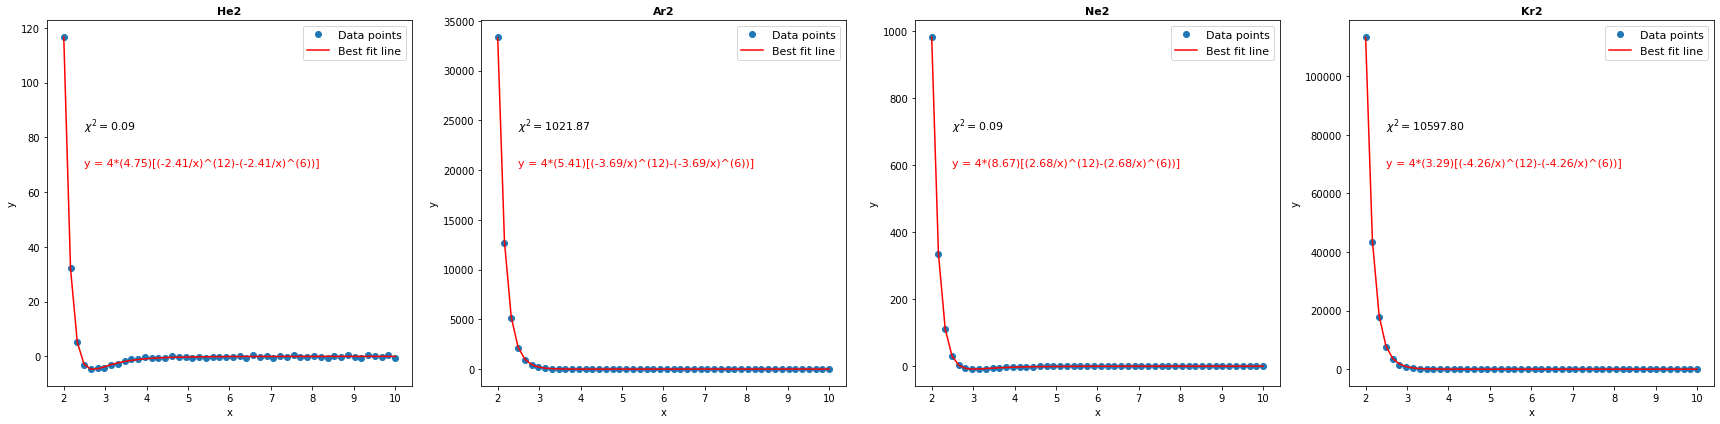

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

# Load data into list
data = {'He2': np.loadtxt('potential_He2_QM_d2.txt'),
        'Ar2': np.loadtxt('potential_Ar2_QM_d2.txt'),
        'Ne2': np.loadtxt('potential_Ne2_QM_d2.txt'),
        'Kr2': np.loadtxt('potential_Kr2_QM_d2.txt')}

# Initialize arrays for x and y values
x = np.empty((len(data['He2']), 4))
y = np.empty((len(data['He2']), 4))

# Fill the x and y arrays with data from the list
for i, key in enumerate(data.keys()):
    x[:, i] = data[key][:, 0]
    y[:, i] = data[key][:, 1]

# Define the Lennard-Jones potential function
def lennard_jones(x, param):
    '''Lennard Jones potential energy'''
    e, o = param # e = potential well depth, o = distance at which potential is zero
    return 4 * e * ((o/x)**12 - (o/x)**6)

# Define the interatomic force function (derivative of Lennard-Jones potential)
def force(x, param):
    '''Interatomic force'''
    e, o = param # e = potential well depth, o = distance at which potential is zero
    return 4 * e * ((-12*o**12/x**13) + (6*o**6/x**7))

# Define the change in force over time (second derivative of Lennard-Jones potential)
def dFdt(x, param):
    '''Change in force over time'''
    e, o = param # e = potential well depth, o = distance at which potential is zero
    return 4 * e * ((156*o**12/x**14) - (42*o**6/x**8))

# Define the chi-squared function
def chi_squared_n(params, x, y, uncertainty = 1):
    '''
    params: list of parameters for the model
    x: independent variable data
    y: dependent variable data
    uncertainty: uncertainty in the y data (default is 1)
    Calculate the expected y values based on the model and parameters
    '''
    expected = lennard_jones(x, params)
    observed = y
    chi2 = np.sum((expected - observed)**2 / uncertainty**2)
    return chi2 / (len(observed) - 1)

# Plot the data and the best fit line for each gas
e = np.empty(4)
o = np.empty(4)
fig, ax = plt.subplots(1,4,figsize = [24,6])
for i in range(len(x[0,:])):
    # The initial guess for the parameters is [1, 15]
    # The method used is Nelder-Mead
    # The chi-squared function is minimized to find the best fit parameters
    min_chi2 = so.minimize(chi_squared_n, [1,15], args=(x[:,i], y[:,i], 1), method='Nelder-Mead')
    print("Fitting results for", list(data.keys())[i])
    print('epsilon =', f'{min_chi2.x[0]:.2f}', '\nsigma =', f'{min_chi2.x[1]:.2f}')
    print('Chi-squared:', min_chi2.fun, '\n')

    # Store best fit parameters in arrays
    e[i] = min_chi2.x[0]
    o[i] = min_chi2.x[1]

    # Plot the data points and the best fit line
    ax[i].plot(x[:,i], y[:,i], 'o', label = 'Data points')
    ax[i].plot(x[:,i], lennard_jones(x[:,i], min_chi2.x), 'r-', label='Best fit line')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(f'{list(data.keys())[i]}', fontsize=11, weight='bold')
    ax[i].legend(fontsize=11)
    # Print chi-squared value on the plot
    ax[i].text(0.1, 0.7, f'$\chi^2 = {min_chi2.fun:.2f}$', fontsize=11, transform=ax[i].transAxes)
    # Print the function of best fit on the plot
    ax[i].text(0.1, 0.6, f'y = 4*({min_chi2.x[0]:.2f})[({min_chi2.x[1]:.2f}/x)^(12)-({min_chi2.x[1]:.2f}/x)^(6))]', fontsize=11, transform=ax[i].transAxes, color='red')
fig.tight_layout()



1a) The nonlinear least-squares method is employed using the SciPy.Optimize package to minimize the $\chi^{2}$ value based on the parameters $\epsilon$ and $\sigma$ in the Lennard-Jones potential energy function that best fit each dataset (He2, Ar2, Ne2, Kr2). The specific optimization method that SciPy uses is the Nelder-Mead method. The Lennard-Jones potential energy function is:

$U(r)=4\epsilon ((\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6})$

The parameters $\epsilon$ and $\sigma$ that were optimized are stored in arrays e and o for the next question. The initial guesses for $\epsilon = 1$ and $\sigma = 15$ were obtained through trial and error to find a set of initial guesses that provides a best fit for all four datasets so that these would not have to be changed each iteration in the for loop. 

C:\Users\Jared Crebo\AppData\Local\Temp\ipykernel_12796\3111504639.py:24: RuntimeWarning: divide by zero encountered in divide
  return 4 * e * ((o/x)**12 - (o/x)**6)
C:\Users\Jared Crebo\AppData\Local\Temp\ipykernel_12796\3111504639.py:24: RuntimeWarning: invalid value encountered in subtract
  return 4 * e * ((o/x)**12 - (o/x)**6)
C:\Users\Jared Crebo\AppData\Local\Temp\ipykernel_12796\3111504639.py:30: RuntimeWarning: divide by zero encountered in divide
  return 4 * e * ((-12*o**12/x**13) + (6*o**6/x**7))
C:\Users\Jared Crebo\AppData\Local\Temp\ipykernel_12796\3111504639.py:30: RuntimeWarning: invalid value encountered in add
  return 4 * e * ((-12*o**12/x**13) + (6*o**6/x**7))


Root found is (2.7000242304576245, -4.706969047843669e-05) which converged in 8 iterations for the He2 gas.
He2 Stable Equilibrium Interatomic Distance: 2.70 Angstrom

Root found is (4.146620611123627, -1.7294097575125382e-05) which converged in 14 iterations for the Ar2 gas.
Ar2 Stable Equilibrium Interatomic Distance: 4.15 Angstrom

Root found is (3.0132981542962924, -8.281819668428526e-07) which converged in 10 iterations for the Ne2 gas.
Ne2 Stable Equilibrium Interatomic Distance: 3.01 Angstrom

Root found is (4.779997033331833, -4.474331811219761e-06) which converged in 16 iterations for the Kr2 gas.
Kr2 Stable Equilibrium Interatomic Distance: 4.78 Angstrom



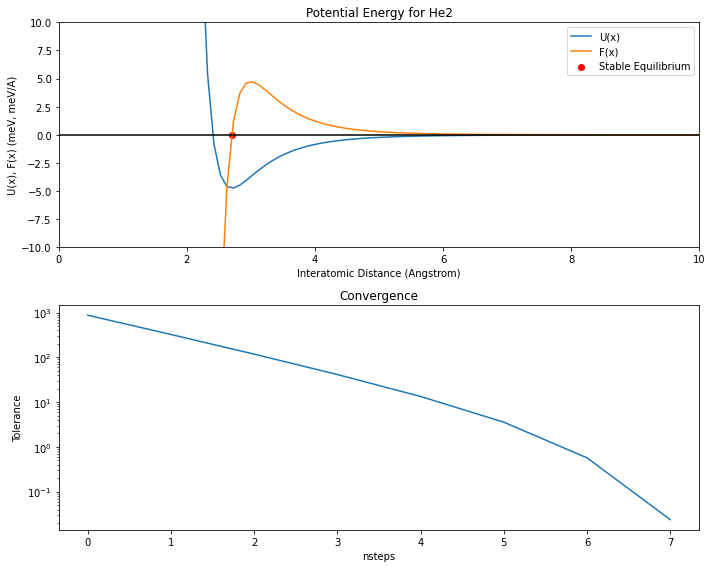

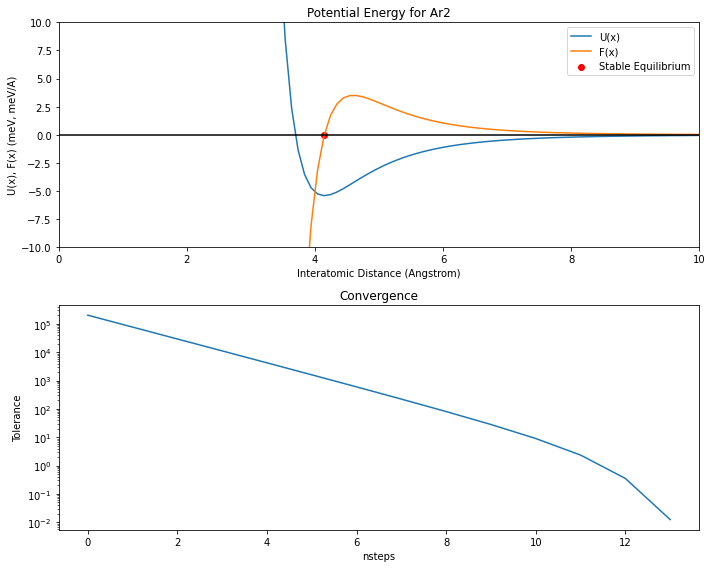

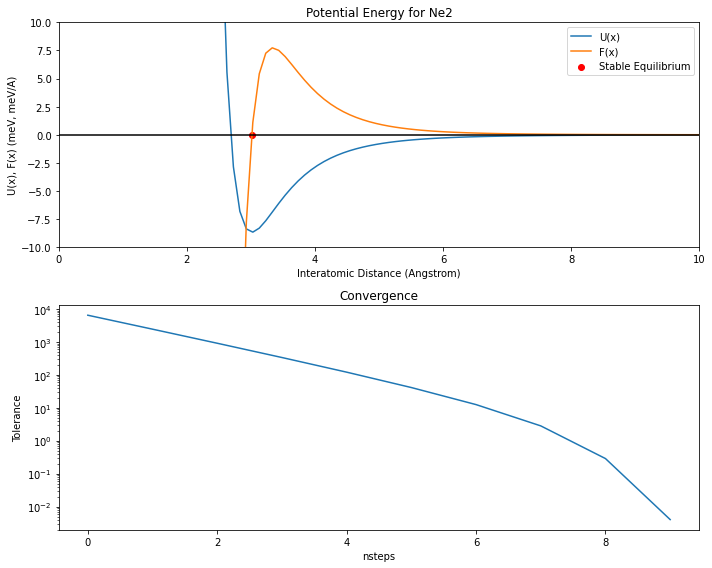

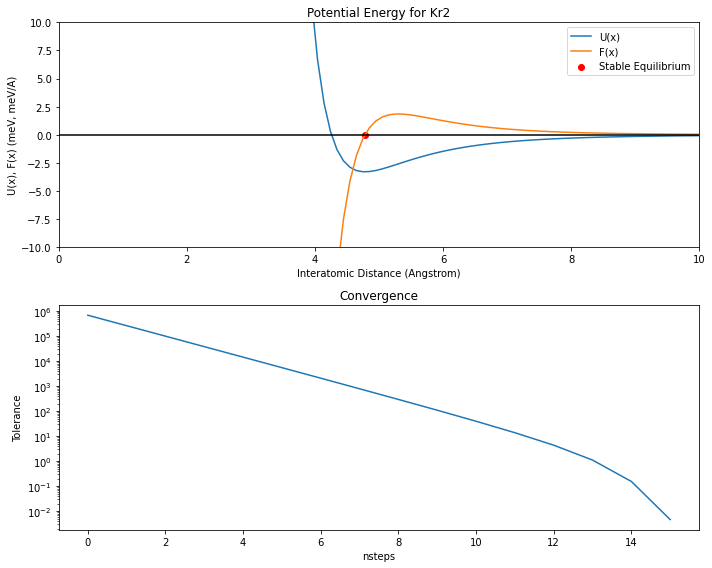

In [6]:
# Initialize x values for plotting
X = np.linspace(0, 10, 100)

# Define Newton-Raphson method for finding roots
def newton_raphson(e, o, x, title = "Potential Energy"):
    # y and y' of initial guess x are calculated as force and dF/dt, respectively
    y = force(x, (e,o))
    y_p = dFdt(x, (e,o))

    # Plot the best fitted potential energy function and force analytically
    fig, ax = plt.subplots(2,figsize=[10,8])
    ax[0].set_title(title)
    ax[0].set_ylabel("U(x), F(x) (meV, meV/A)")
    ax[0].set_xlabel("Interatomic Distance (Angstrom)")
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(-10,10)
    ax[0].plot(X,lennard_jones(X, (e, o)),label="U(x)")
    ax[0].plot(X,force(X, (e, o)),label="F(x)")
    ax[0].hlines(0,min(X),max(X),color="black")

    # Set the tolerance criterion for convergence
    tol = 1e-4
    converged = False
    nsteps = 0
    tolerance = []

    # Iterate until convergence is reached
    while not converged:
        nsteps += 1 # Increment the number of steps
        tolerance.append(abs(y)) # Append the current tolerance to the list for future plotting
        x += -y / y_p # Update x using the Newton-Raphson method
        y = force(x, (e,o)) # Calculate the new force
        y_p = dFdt(x, (e,o)) # Calculate the new second derivative
        if abs(y) < tol: # Check if the force is within the tolerance
            # If the force is within the tolerance, break the loop
            converged = True
            print("Root found is (" + str(x) + ", " + str(y) + ") which converged in " + str(nsteps) + f" iterations for the {list(data.keys())[i]} gas.")
            print(f"{list(data.keys())[i]} Stable Equilibrium Interatomic Distance:", f'{x:.2f}', "Angstrom\n")
            # Plot the stable equilibrium point
            ax[0].scatter(x,y,label="Stable Equilibrium",color="red")
    ax[0].legend()
    ax[1].set_title("Convergence")
    ax[1].set_ylabel("Tolerance")
    ax[1].set_xlabel("nsteps")
    # Plot the tolerance over iterations
    ax[1].plot(np.arange(0,nsteps,1),tolerance,label="Convergence")
    ax[1].set_yscale('log')
    fig.tight_layout()

for i in range(len(x[0,:])):
    # Call the Newton-Raphson method for each gas
    # The initial guess for the interatomic distance is 2 Angstroms
    newton_raphson(e[i],o[i], 2, title = f"Potential Energy for {list(data.keys())[i]}")



The interatomic distance at stable equilibrium is the distance at which the force does not change with respect to time in a stable form. Mathematically, this means for a potential energy function $U(x)$, at the point of stable equilibrium $\frac{dU}{dx} = 0$ and is a minimum. Using the parameters $\epsilon$ and $\sigma$ from the previous question, the derivative (force) and second derivative can be analytically determined with respect to interatomic distance, x. The Newton-Raphson method is employed to solve for the root of the force function, which corresponds to the point of stable equilibrium. This method uses an initial guess of $x = 2$ for each function. 

The number of iterations for the Newton-Raphson method is plotted below each figure of $U(x)$. The tolerance criterion is set to $1e-4$. 